In [2]:
from ising_model import ClassicIsing
import electron
from grid import Grid, HoleGrid, Mobius, Cylinder, Torus
import matplotlib.pyplot as plt
import numpy as np

T=1.00, <|M|>=0.972
T=1.09, <|M|>=0.932
T=1.17, <|M|>=0.890
T=1.26, <|M|>=0.740
T=1.34, <|M|>=0.797
T=1.43, <|M|>=0.461
T=1.52, <|M|>=0.474
T=1.60, <|M|>=0.316
T=1.69, <|M|>=0.202
T=1.78, <|M|>=0.198
T=1.86, <|M|>=0.148
T=1.95, <|M|>=0.150
T=2.03, <|M|>=0.131
T=2.12, <|M|>=0.229
T=2.21, <|M|>=0.105
T=2.29, <|M|>=0.084
T=2.38, <|M|>=0.117
T=2.47, <|M|>=0.146
T=2.55, <|M|>=0.110
T=2.64, <|M|>=0.105
T=2.72, <|M|>=0.161
T=2.81, <|M|>=0.069
T=2.90, <|M|>=0.056
T=2.98, <|M|>=0.076
T=3.07, <|M|>=0.115
T=3.16, <|M|>=0.071
T=3.24, <|M|>=0.093
T=3.33, <|M|>=0.068
T=3.41, <|M|>=0.117
T=3.50, <|M|>=0.077


C:\Users\jason\AppData\Local\Temp\ipykernel_5528\1854993501.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


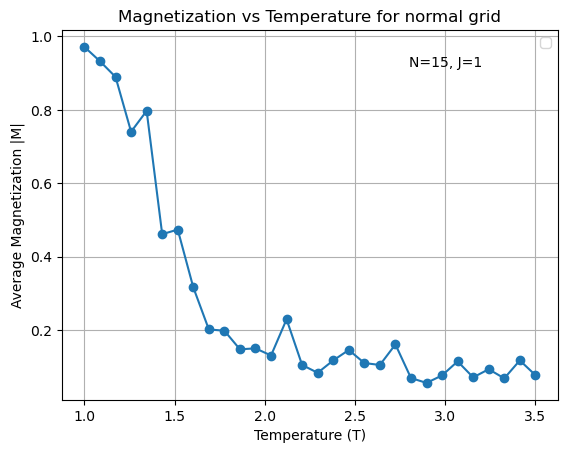

In [10]:
# --- Parameters ---
N = 15            # Lattice size
J = 1          # Coupling constant
temps = np.linspace(1, 3.5, 30)  # Temperature range
eq_steps = 10  # Steps for equilibration
mc_steps = 25  # Steps for measurement
runs_per_T = 10    # Average over multiple runs




def B_vs_T(temps, eq_steps, mc_steps, runs_per_T):
    magnetizations = []
    for T in temps:
        newGrid = Grid(n_x=N, n_y=N, gridPointObject=electron.ClassicElectron)
        isingModel = ClassicIsing(newGrid, temperature=T, ferromagnetivity=J,Mf_External=0)
        total_mag = 0
        for run in range(runs_per_T):
            #equilibration
            isingModel.runSimulation(eq_steps)
            #measurement
            isingModel.runSimulation(mc_steps)
            final_grid = Grid.output(grid=isingModel.grid.grid_history[-1])
            # calculate magnetization
            mag = np.abs(np.sum(final_grid)) / (N * N)
            total_mag += mag
        avg_mag = total_mag / runs_per_T
        magnetizations.append(avg_mag)
        print(f"T={T:.2f}, <|M|>={magnetizations[-1]:.3f}")

    return magnetizations


mags = B_vs_T(temps, eq_steps, mc_steps, runs_per_T)


# graphing the results
plt.plot(temps, mags, marker='o')
plt.xlabel('Temperature (T)')
plt.ylabel('Average Magnetization |M|')
plt.title('Magnetization vs Temperature for normal grid')
plt.text(0.7, 0.9, f'N={N}, J={J}', transform=plt.gca().transAxes)
plt.legend()
plt.grid()
plt.show()